In [36]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
from IPython.display import SVG 
from sknetwork.visualization import svg_graph 
from sknetwork.data import Bunch 
from sknetwork.ranking import PageRank 

In [2]:
def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 
    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 
    names = np.array(list(G.nodes())) 
    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 
    pagerank = PageRank() 
    scores = pagerank.fit_transform(adjacency) 
    if show_names: 
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 
    else: 
        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 
    return SVG(image) 

In [3]:
G = nx.florentine_families_graph()
df = nx.to_pandas_edgelist(G)[['source', 'target']] # cut the weights, for visualization
G = nx.from_pandas_edgelist(df)

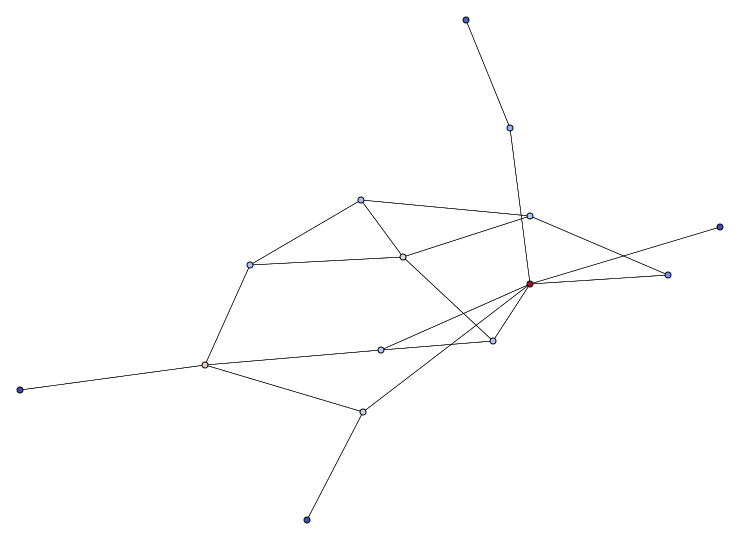

In [40]:
# this is a network / graph

draw_graph(G, node_size=3)

## Degree Centrality


In [41]:
deg_cent = nx.degree_centrality(G)

deg_cent_df = pd.DataFrame().from_dict(deg_cent, orient='index')
deg_cent_df.columns = ['degree_centrality']
deg_cent_df.sort_values('degree_centrality', ascending=False, inplace=True)
deg_cent_df.head(10)

,degree_centrality
Medici,0.428571
Strozzi,0.285714
Guadagni,0.285714
Ridolfi,0.214286
Tornabuoni,0.214286
Albizzi,0.214286
Castellani,0.214286
Peruzzi,0.214286
Bischeri,0.214286
Barbadori,0.142857


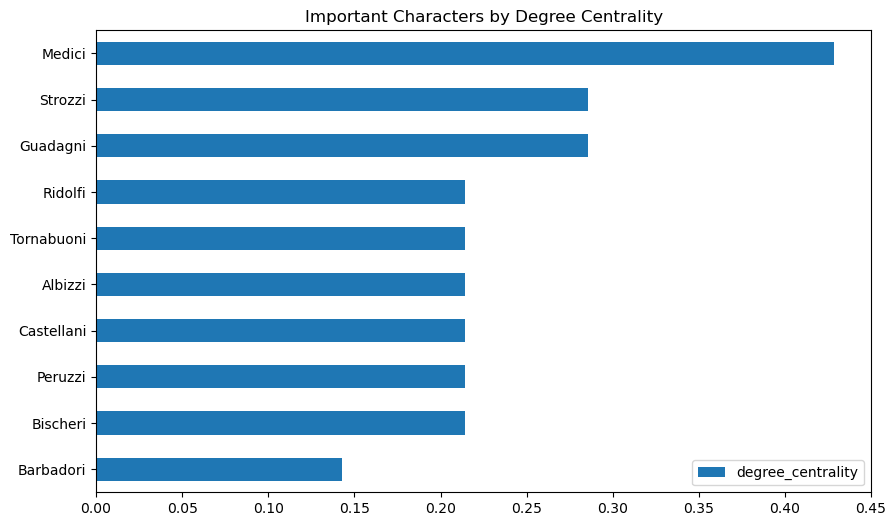

In [42]:
title = 'Important Characters by Degree Centrality'

deg_cent_df.head(10).plot.barh(figsize=(10,6), title=title).invert_yaxis()

## Betweenness Centrality


In [43]:
betw_cent = nx.betweenness_centrality(G)

betw_cent_df = pd.DataFrame().from_dict(betw_cent, orient='index')
betw_cent_df.columns = ['betweenness_centrality']
betw_cent_df.sort_values('betweenness_centrality', ascending=False, inplace=True)
betw_cent_df.head(10)

,betweenness_centrality
Medici,0.521978
Guadagni,0.254579
Albizzi,0.212454
Salviati,0.142857
Ridolfi,0.113553
Bischeri,0.104396
Strozzi,0.102564
Barbadori,0.093407
Tornabuoni,0.091575
Castellani,0.054945


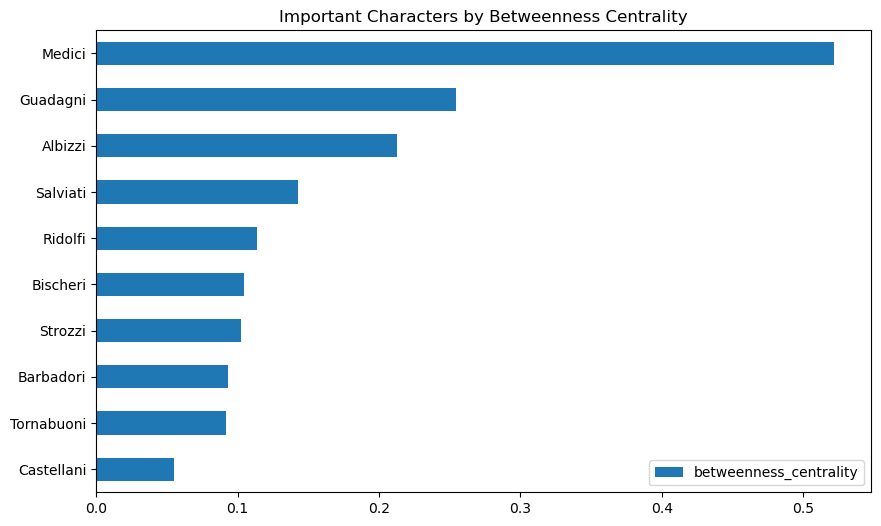

In [44]:
title = 'Important Characters by Betweenness Centrality'

betw_cent_df.head(10).plot.barh(figsize=(10,6), title=title).invert_yaxis()

## Closeness Centrality


In [45]:
close_cent = nx.closeness_centrality(G)

close_cent_df = pd.DataFrame().from_dict(close_cent, orient='index')
close_cent_df.columns = ['closeness_centrality']
close_cent_df.sort_values('closeness_centrality', ascending=False, inplace=True)
close_cent_df.head(10)

,closeness_centrality
Medici,0.560000
Ridolfi,0.500000
Tornabuoni,0.482759
Albizzi,0.482759
Guadagni,0.466667
Barbadori,0.437500
Strozzi,0.437500
Bischeri,0.400000
Salviati,0.388889
Castellani,0.388889


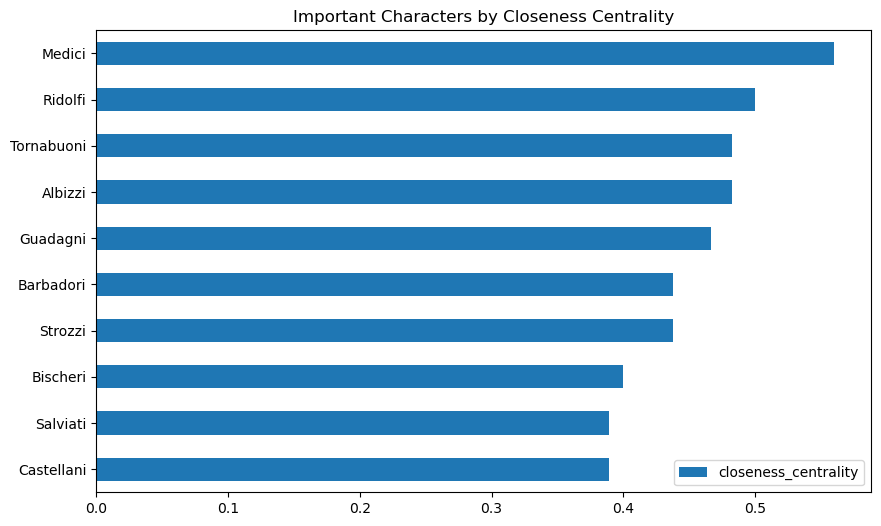

In [46]:
title = 'Important Characters by Closeness Centrality'

close_cent_df.head(10).plot.barh(figsize=(10,6), title=title).invert_yaxis()

## PageRank

In [47]:
page_rank = nx.pagerank(G)

pr_df = pd.DataFrame().from_dict(page_rank, orient='index')
pr_df.columns = ['page_rank']
pr_df.sort_values('page_rank', ascending=False, inplace=True)
pr_df.head(10)

,page_rank
Medici,0.145818
Guadagni,0.098399
Strozzi,0.088098
Albizzi,0.079122
Tornabuoni,0.071279
Ridolfi,0.069574
Castellani,0.069330
Bischeri,0.068862
Peruzzi,0.067875
Salviati,0.061303


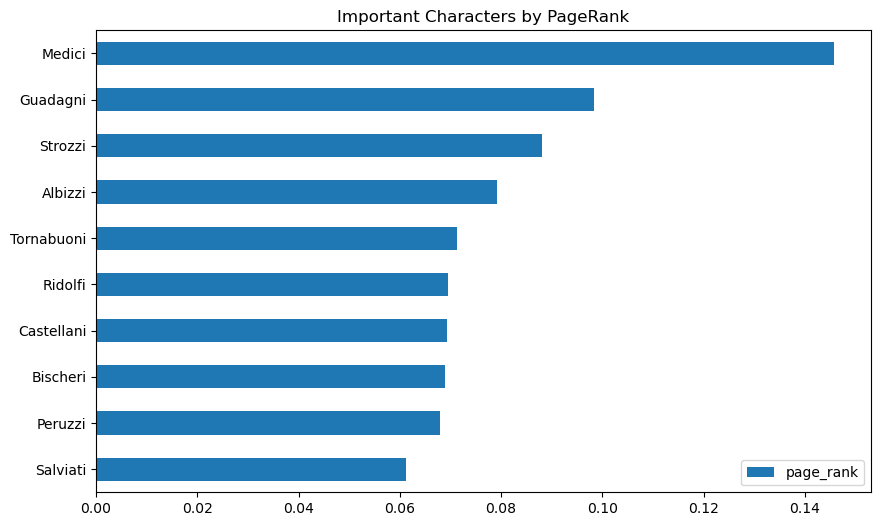

In [48]:

title = 'Important Characters by PageRank'

pr_df.head(10).plot.barh(figsize=(10,6), title=title).invert_yaxis()